In [202]:
# IMPORT RELEVANT PACKAGES

import numpy as np
import pandas as pd
import os

#import geopandas as gdp - not sure why this doesn't import

import folium as flm
import seaborn as sns
import json


import matplotlib as mpl
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc,rcParams
import matplotlib.font_manager as font_manager
from matplotlib import cm



import itertools
from fuzzywuzzy import fuzz
from fuzzywuzzy import process 

import numpy_financial as npf

!pip install geopandas
!pip3 install geopandas
!pip install --upgrade matplotlib

import matplotlib.patches as mpatches

from CEM_functions import *




[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


## Outputs from CEM

### read in the results files
- CEM_dir_index = 35
- CEM_age_dir_index = 39
- CEM_eff_dir_index = 39
- CEM_storage_dir_index = 43
- CEM_flat_dir_index = 40



### flat demand case

In [249]:
CEM_dir = 'CEM_0/'
CEM_dir_index = 35

CEM_scenarios_dict = create_sensitivity_dict(CEM_dir)

CEM_min_hours_dict = create_UP_min_hours_dict(CEM_scenarios_dict,CEM_dir,CEM_dir_index)
results_df = pd.DataFrame(CEM_min_hours_dict[0]).T.reset_index()

In [250]:
# results_df = pd.DataFrame.from_dict(CEM_min_hours_dict[0]['emissions_TES0'], orient='index').transpose()


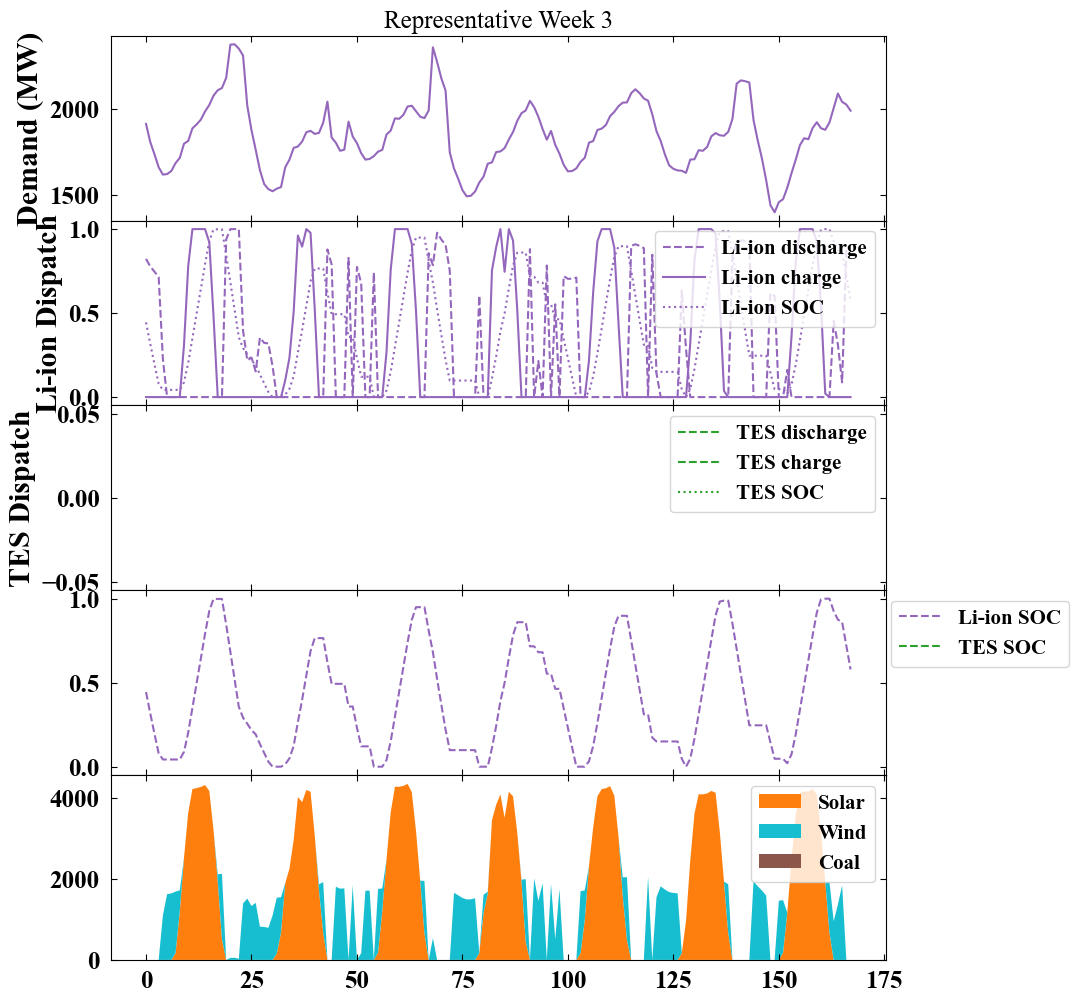

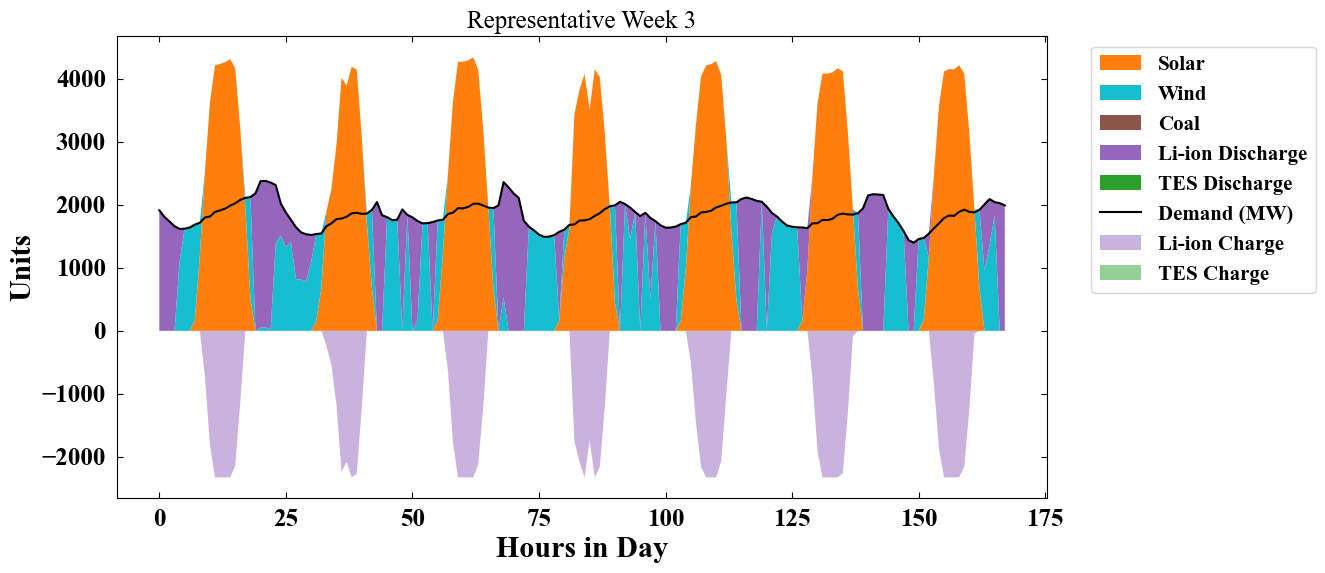

In [251]:
n=3
plot_dispatch_separate(n,results_df)
plot_dispatch(n,results_df)
plt.legend(bbox_to_anchor=(1.3,1))

In [252]:
results_df.keys

<bound method NDFrame.keys of                index Q_TES_heater_peak  \
0    emissions_TES60               0.0   
1    emissions_TES50               0.0   
2    emissions_TES70               0.0   
3    emissions_TES80               0.0   
4    emissions_TES30               0.0   
5    emissions_TES90               0.0   
6    emissions_TES40               0.0   
7        emissions50               0.0   
8        emissions40               0.0   
9        emissions20               0.0   
10       emissions30               0.0   
11      emissions100               0.0   
12       emissions10               0.0   
13               TES               0.0   
14        emissions0               0.0   
15              base               0.0   
16    emissions_TES0        474.795203   
17   emissions_TES10               0.0   
18   emissions_TES20               0.0   
19  emissions_TES100               0.0   
20       emissions80               0.0   
21       emissions90               0.0   
22  

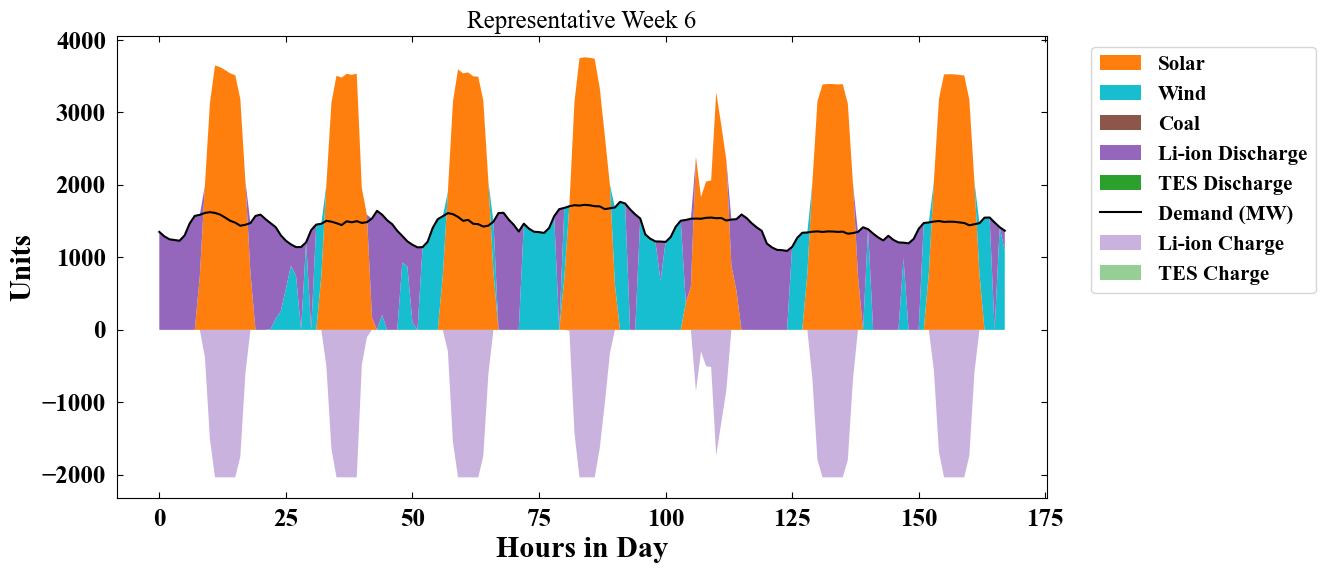

In [253]:
key = 'base'
# key = 'emissions_TES0'
# key = '/CEM_emissions_TES_flat0'   
# key = '/CEM_base_flat'  
# key = '/CEM_emissions_flat0' 
results_df = pd.DataFrame.from_dict(CEM_min_hours_dict[0][key], orient='index').transpose()
n=6 #4,5,12,14,20
plot_dispatch(n,results_df)
plt.legend(bbox_to_anchor=(1.3,1))

In [254]:
## find the system cost difference
results_df['objective_value'] 
CEM_baseflat = 2009770.306708
CEM_TES_emissions0 = 2346407.87454 
CEM_emissions0 = 2417976.898111
# 100*(CEM_baseflat-CEM_TES_emissions0)/CEM_baseflat
100*(CEM_emissions0-CEM_TES_emissions0)/CEM_emissions0

2.9598720991466854

In [255]:
CEM_emissions0-CEM_TES_emissions0

71569.02357099997

/Users/serenapatel/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/GitHub/Thermal-Energy-System-Dispatch-and-Sizing-Optimization/TrombayU5_repweeks/RESULTS/CEM_functions.py:333: RuntimeWarning: invalid value encountered in divide
  SOC_array = SOC_array + list(SOC_week / results_df["tank_energy_max"][0])


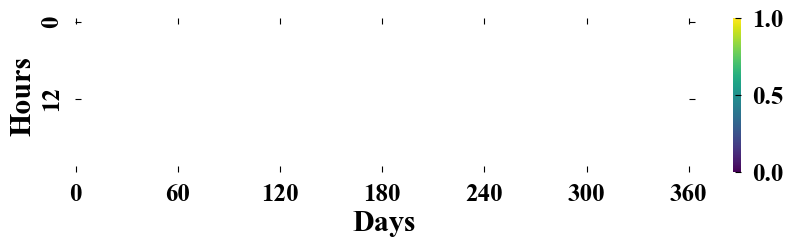

In [256]:
plot_storage_heatmap(results_df)

In [257]:
## make the dfs
curtailment_df = create_curtailment_df(CEM_min_hours_dict)
generation_df = create_generation_df(CEM_min_hours_dict)
capacity_df = create_capacity_df(CEM_min_hours_dict)
E_storage_df = create_E_storage_df(CEM_min_hours_dict)
P_storage_df = create_P_storage_df(CEM_min_hours_dict)
storage_dispatch_df = create_storage_dispatch_df(CEM_min_hours_dict)
conversions_df = create_conversions_df(CEM_min_hours_dict)

emissions_df = create_emissions_df(CEM_min_hours_dict)
syscost_df = create_syscost_df(CEM_min_hours_dict)


In [258]:
generation_df

,Label,Solar,Wind,Coal
0,emissions0,1.190731e+07,2.267219e+06,0.000000
1,emissions_TES0,1.213659e+07,2.390330e+06,0.000000
2,emissions10,1.243534e+07,1.767513e+06,19089.093130
3,emissions_TES10,1.243534e+07,1.767513e+06,19089.093130
4,emissions20,1.195813e+07,2.185190e+06,38178.186259
5,emissions_TES20,1.195813e+07,2.185190e+06,38178.186259
6,emissions_TES30,1.155231e+07,2.536910e+06,57267.279389
7,emissions30,1.155231e+07,2.536910e+06,57267.279389
8,emissions40,1.110440e+07,2.927261e+06,76356.372519
9,emissions_TES40,1.110440e+07,2.927261e+06,76356.372519


Text(64.33333333333333, 0.5, 'System Cost (USD/year)')

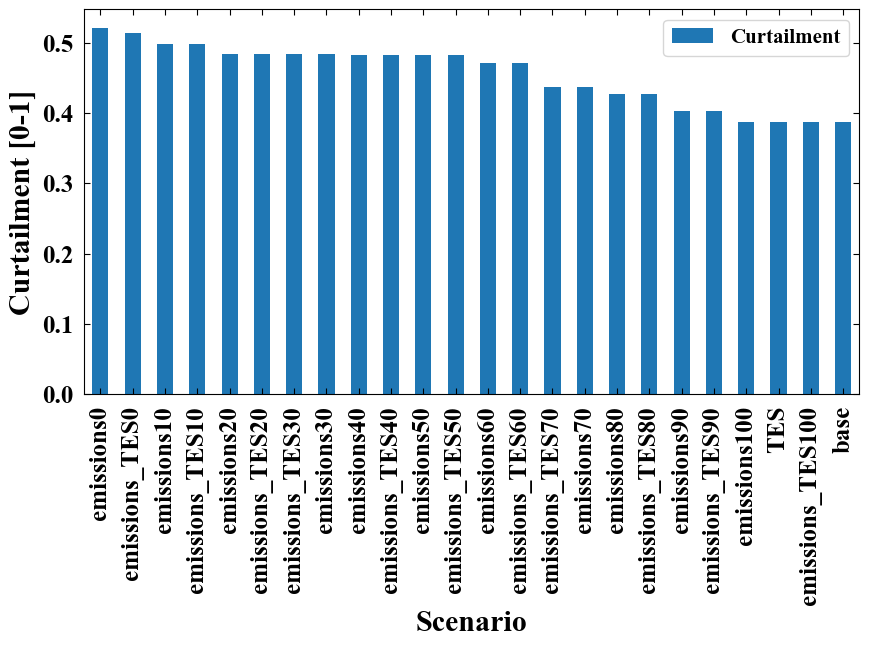

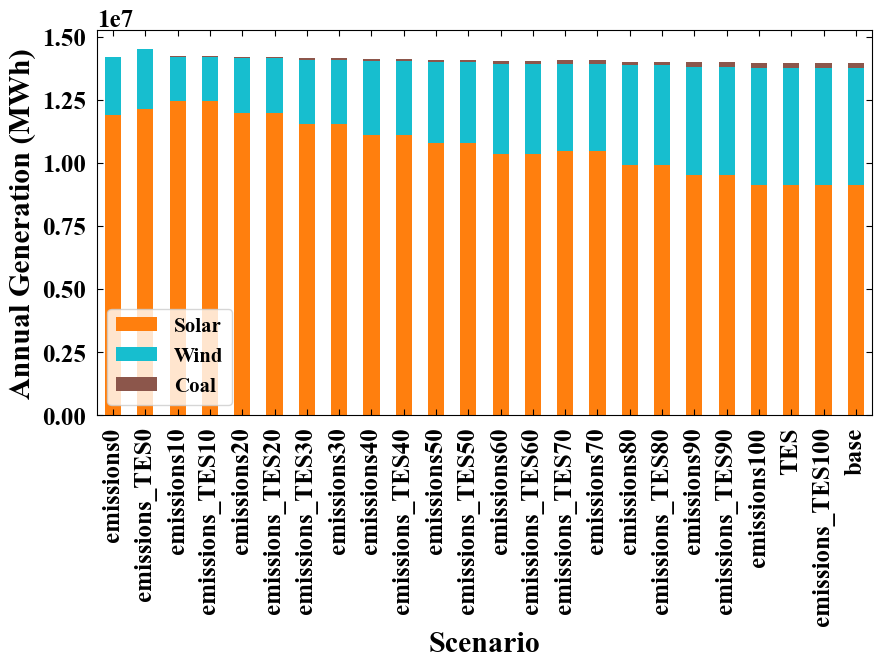

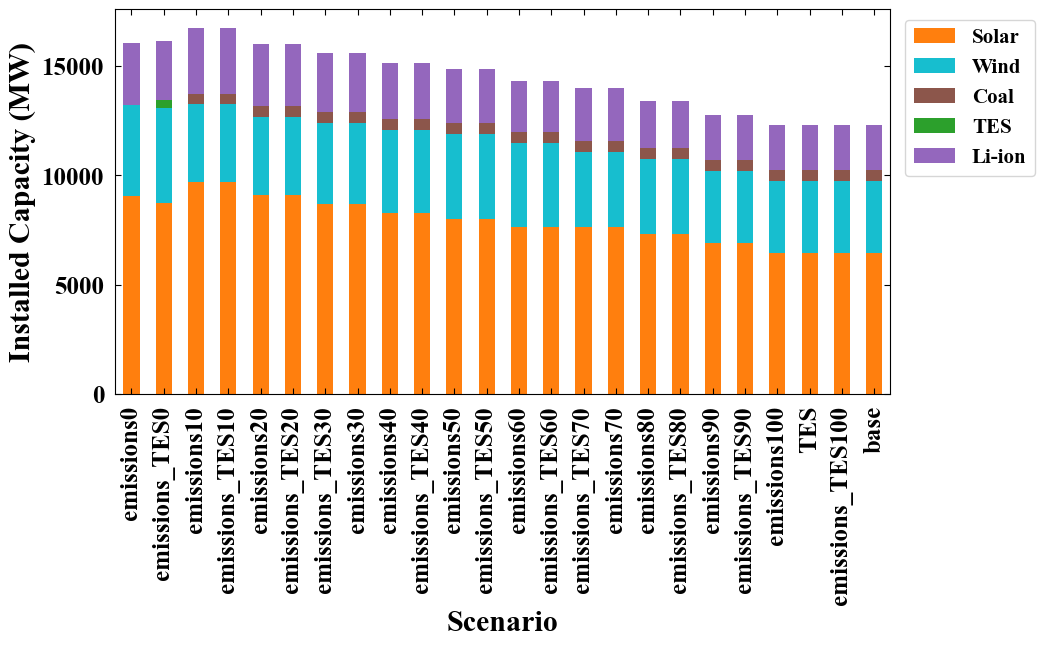

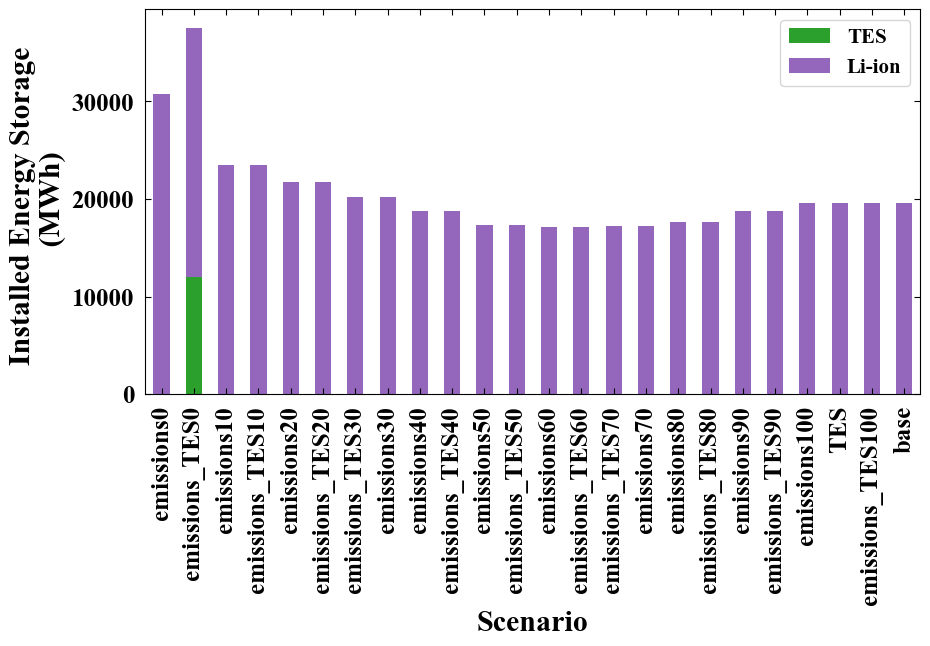

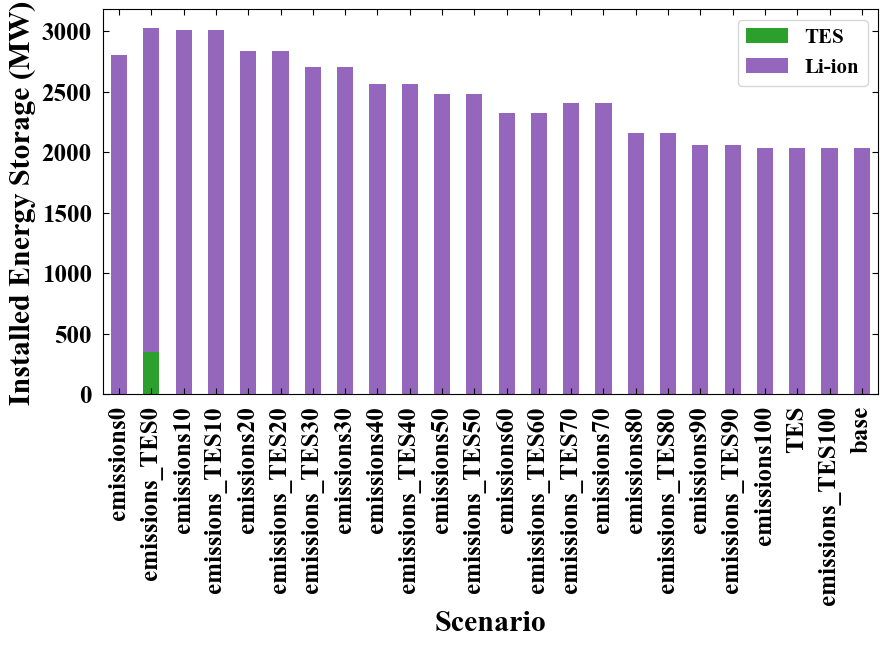

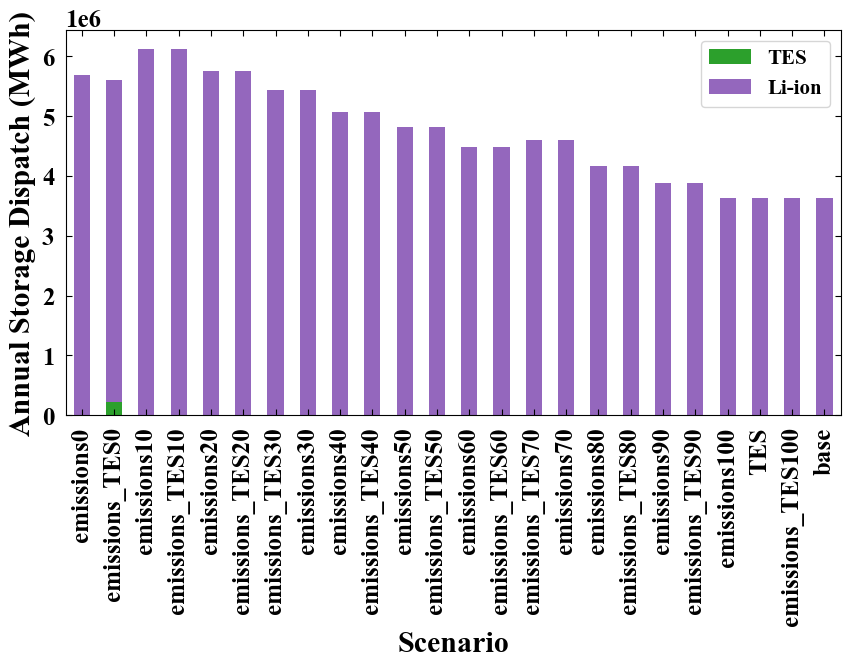

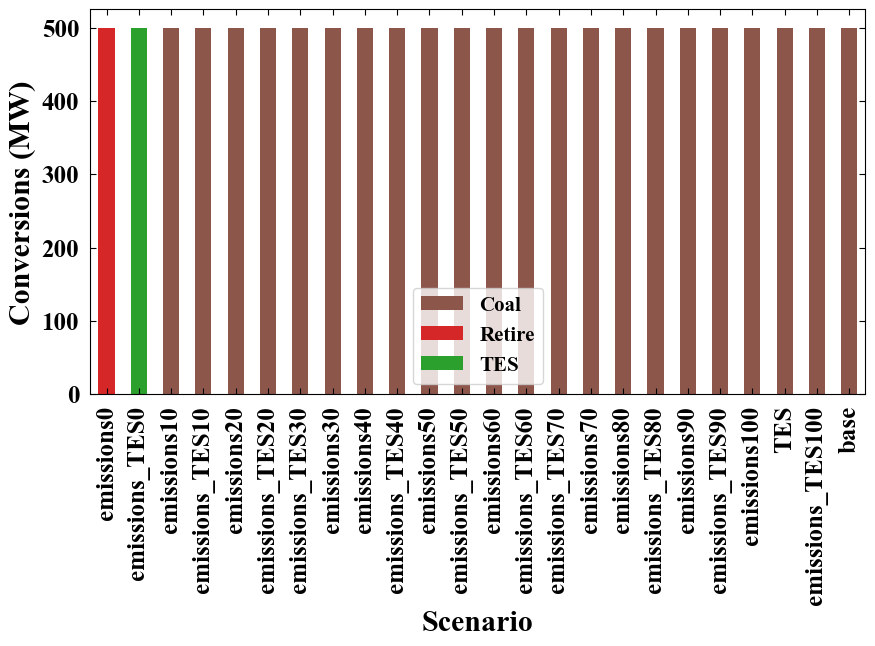

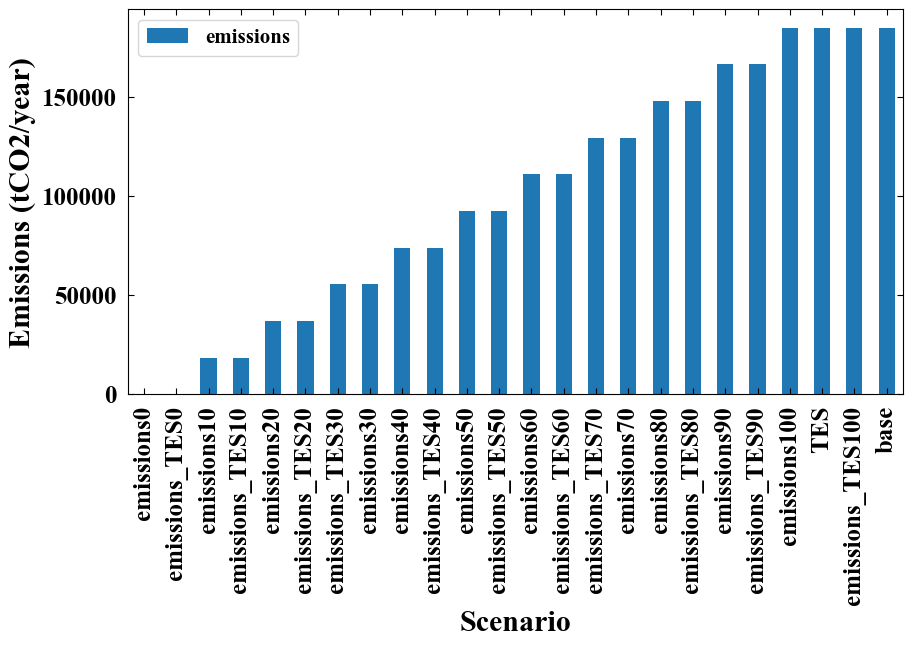

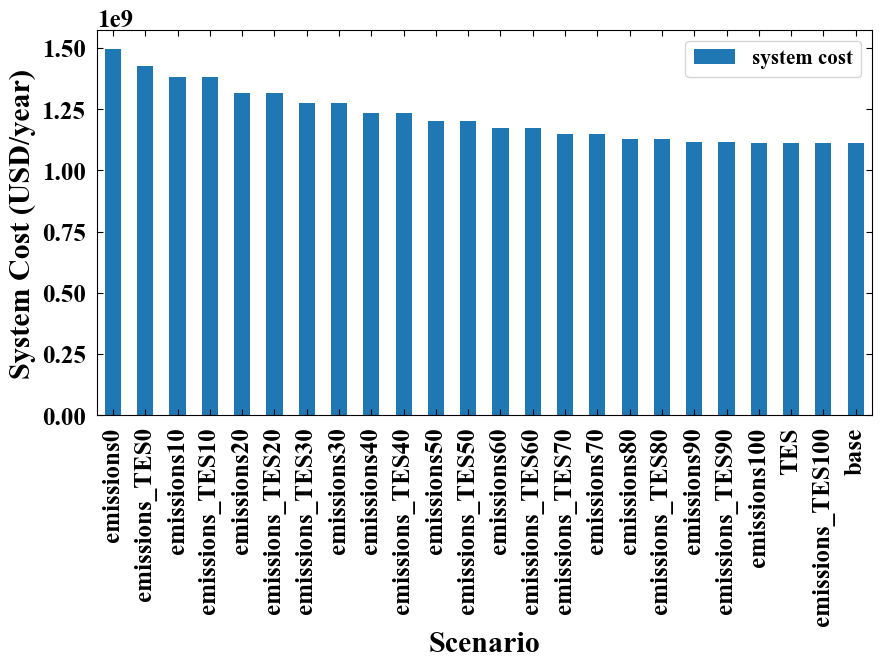

In [259]:
#plots 
plot_stacked(curtailment_df,'curtailment')
plt.ylabel('Curtailment [0-1]')


plot_stacked(generation_df,'generation')
plt.ylabel('Annual Generation (MWh)')

plot_stacked(capacity_df,'capacity')
plt.ylabel('Installed Capacity (MW)')
plt.legend(bbox_to_anchor=(1.2,1))

plot_stacked(E_storage_df,'e_storage')
plt.ylabel('Installed Energy Storage \n (MWh)')

plot_stacked(P_storage_df,'p_storage')
plt.ylabel('Installed Energy Storage (MW)')

plot_stacked(storage_dispatch_df,'storage_dis')
plt.ylabel('Annual Storage Dispatch (MWh)')

plot_stacked(conversions_df,'conversions')
plt.ylabel('Conversions (MW)')


plot_stacked(emissions_df,'emissions')
plt.ylabel('Emissions (tCO2/year)')

plot_stacked(syscost_df,'syscost')
plt.ylabel('System Cost (USD/year)')


Text(83.20833333333333, 0.5, 'System Cost Difference (%)')

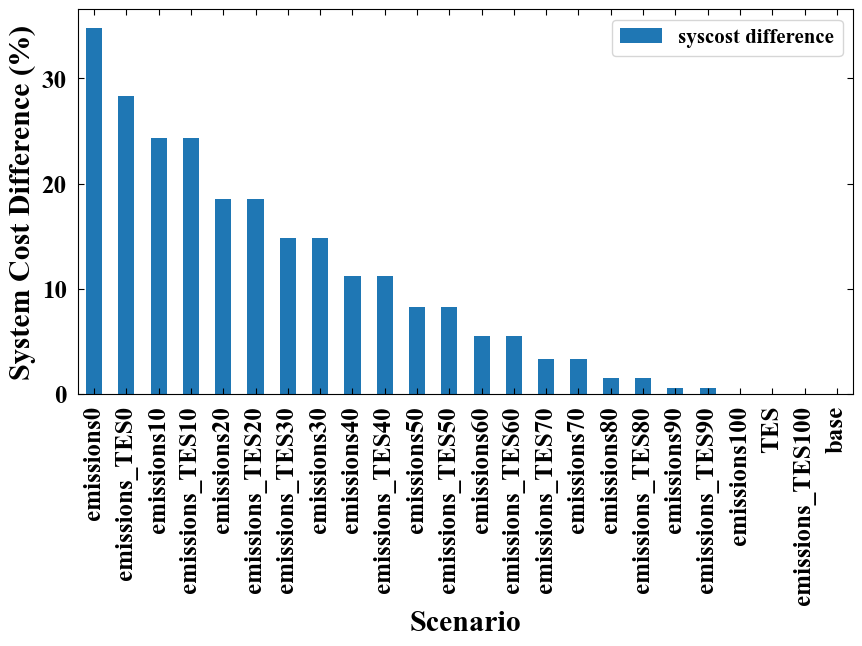

In [260]:
base_syscost = syscost_df.iloc[23,1]
syscost_df['syscost difference']  = ((syscost_df['system cost'] - base_syscost)/base_syscost)*100

syscost_diff_df = syscost_df.drop(['system cost'],axis=1)

plot_stacked(syscost_diff_df,'syscost_diff')
plt.ylabel('System Cost Difference (%)')

In [261]:
generation_df

,Label,Solar,Wind,Coal
0,emissions0,1.190731e+07,2.267219e+06,0.000000
1,emissions_TES0,1.213659e+07,2.390330e+06,0.000000
2,emissions10,1.243534e+07,1.767513e+06,19089.093130
3,emissions_TES10,1.243534e+07,1.767513e+06,19089.093130
4,emissions20,1.195813e+07,2.185190e+06,38178.186259
5,emissions_TES20,1.195813e+07,2.185190e+06,38178.186259
6,emissions_TES30,1.155231e+07,2.536910e+06,57267.279389
7,emissions30,1.155231e+07,2.536910e+06,57267.279389
8,emissions40,1.110440e+07,2.927261e+06,76356.372519
9,emissions_TES40,1.110440e+07,2.927261e+06,76356.372519


In [262]:
#capacity factor calculation

180540.222310/(8736*500) #MWh/year / MW*hours 

0.041332468477564104

In [263]:
capacity_df

,Label,Solar,Wind,Coal,TES,Li-ion
0,emissions0,9071.267900,4145.738992,0.0,0.000000,2803.189759
1,emissions_TES0,8755.839672,4323.927067,0.0,350.258348,2680.002863
2,emissions10,9671.403871,3563.421876,500.0,0.000000,3012.732354
3,emissions_TES10,9671.403871,3563.421876,500.0,0.000000,3012.732354
4,emissions20,9102.896702,3561.979263,500.0,0.000000,2839.576553
5,emissions_TES20,9102.896702,3561.979263,500.0,0.000000,2839.576553
6,emissions_TES30,8686.743205,3689.041627,500.0,0.000000,2704.702747
7,emissions30,8686.743205,3689.041627,500.0,0.000000,2704.702747
8,emissions40,8270.216058,3802.729086,500.0,0.000000,2566.138015
9,emissions_TES40,8270.216058,3802.729086,500.0,0.000000,2566.138015


In [264]:
P_storage_df

,Label,TES,Li-ion
0,emissions0,0.000000,2803.189759
1,emissions_TES0,350.258348,2680.002863
2,emissions10,0.000000,3012.732354
3,emissions_TES10,0.000000,3012.732354
4,emissions20,0.000000,2839.576553
5,emissions_TES20,0.000000,2839.576553
6,emissions_TES30,0.000000,2704.702747
7,emissions30,0.000000,2704.702747
8,emissions40,0.000000,2566.138015
9,emissions_TES40,0.000000,2566.138015


In [265]:
E_storage_df

,Label,TES,Li-ion
0,emissions0,0.000000e+00,30687.526318
1,emissions_TES0,1.200000e+04,25543.357374
2,emissions10,0.000000e+00,23475.654876
3,emissions_TES10,0.000000e+00,23475.654876
4,emissions20,0.000000e+00,21710.585920
5,emissions_TES20,0.000000e+00,21710.585920
6,emissions_TES30,0.000000e+00,20166.982046
7,emissions30,0.000000e+00,20166.982046
8,emissions40,0.000000e+00,18778.027632
9,emissions_TES40,0.000000e+00,18778.027632


In [266]:
generation_df.set_index('Label',inplace=True)
capacity_df.set_index('Label',inplace=True)
syscost_diff_df.set_index('Label',inplace=True)
syscost_df.set_index('Label',inplace=True)

labels_filter = ['emissions0',
'emissions_TES0',
'emissions10',
'emissions20',
'emissions30',
'emissions40',
'emissions50',
'emissions60',
'emissions70',
'emissions80',
'emissions90',
'base']



Text(64.33333333333333, 0.5, 'System Cost Relative \n to Base Case')

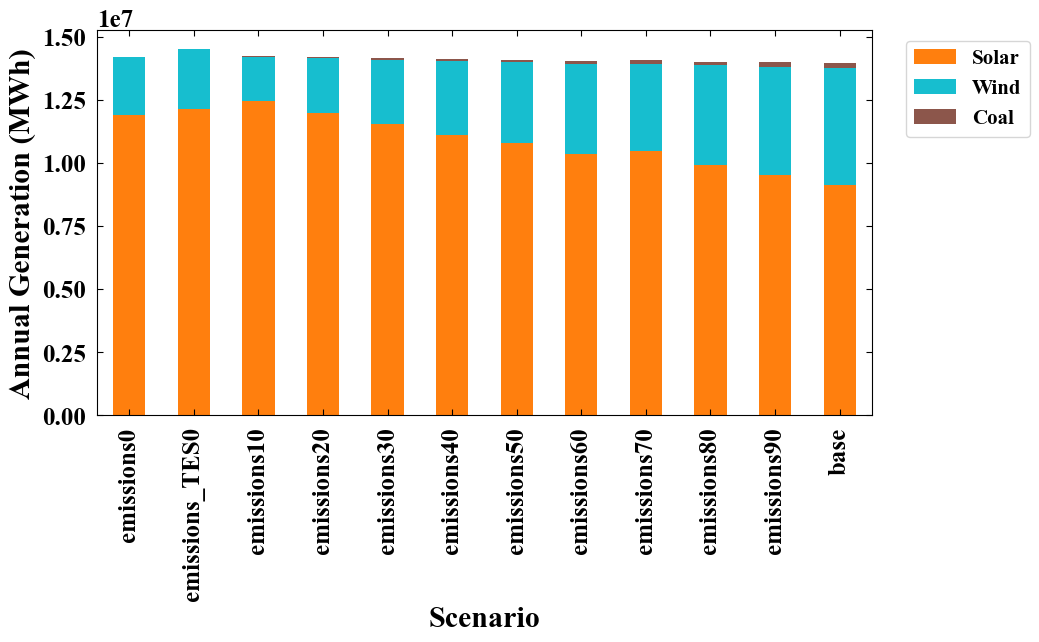

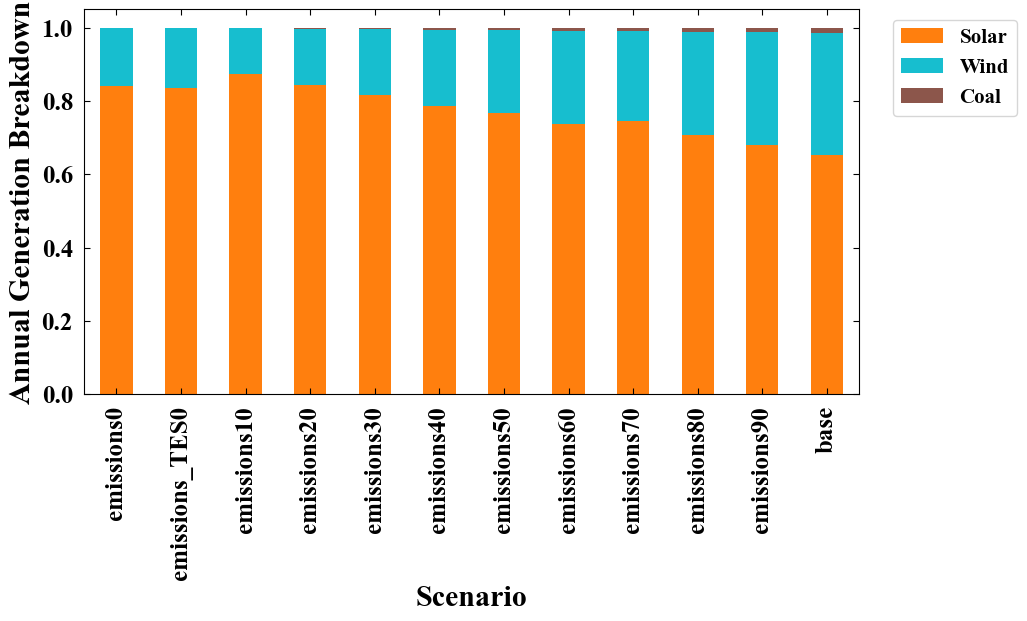

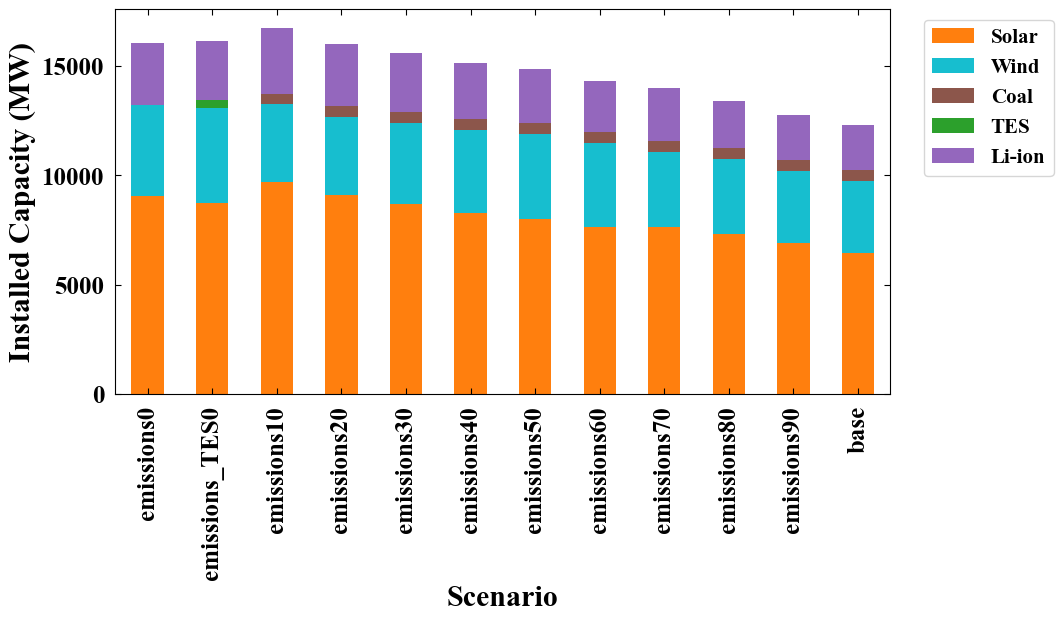

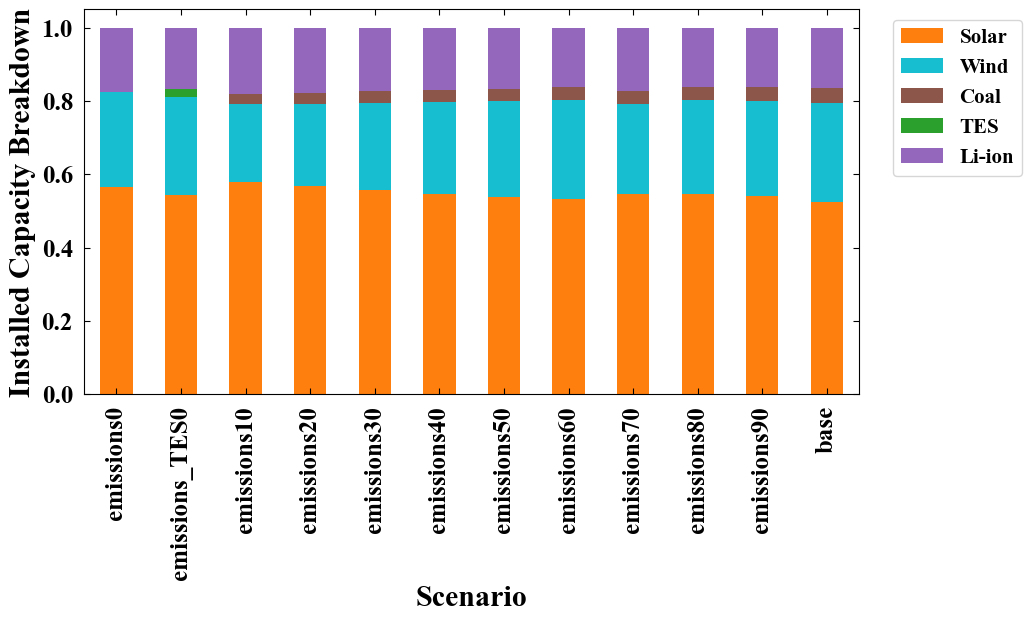

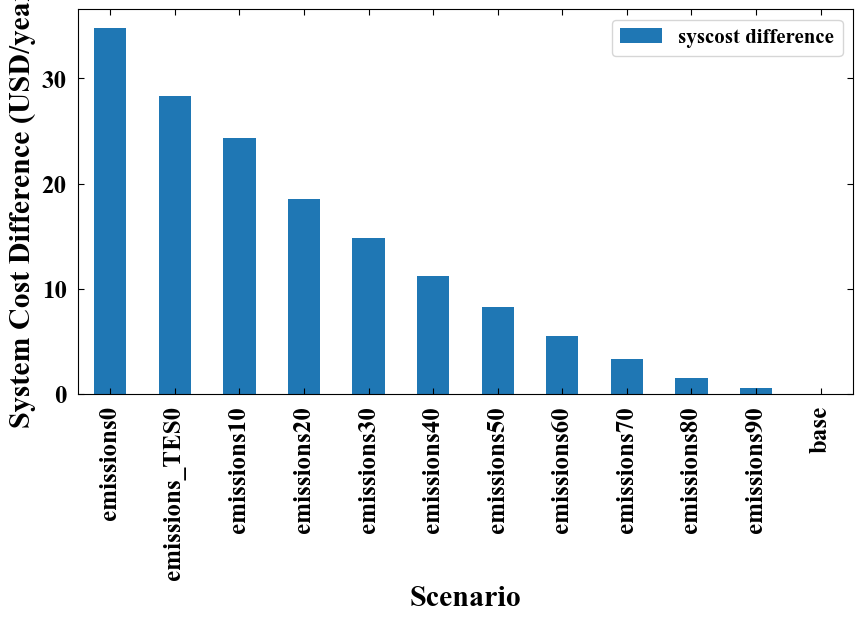

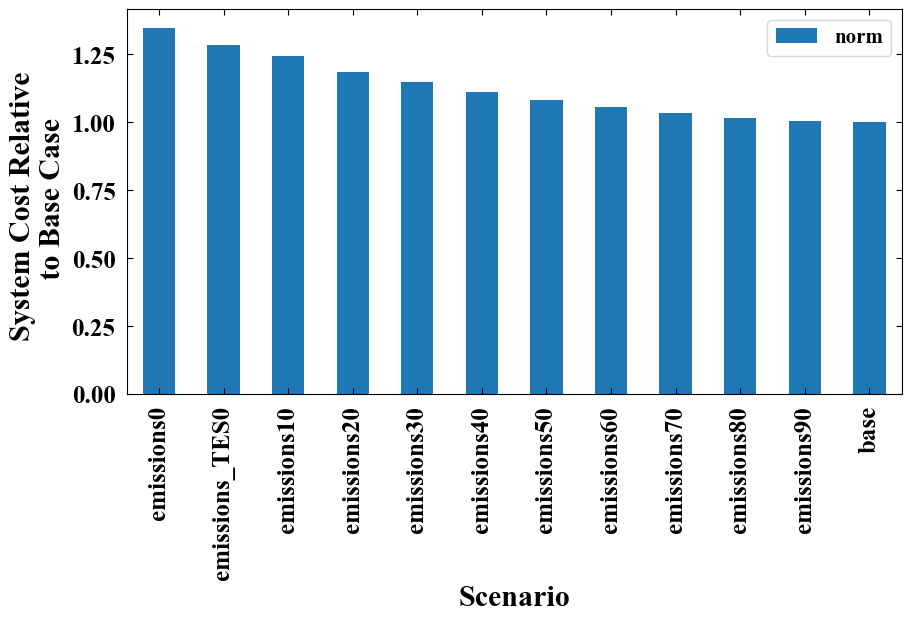

In [267]:
#regular generation
plot_stacked(generation_df.loc[labels_filter].reset_index(),'generation_filter')
plt.ylabel('Annual Generation (MWh)')
plt.legend(bbox_to_anchor=(1.03,1))

#normalized
generation_norm_df = generation_df.copy()
generation_norm_df['Solar'] = generation_df['Solar']/generation_df.sum(axis=1)
generation_norm_df['Wind'] = generation_df['Wind']/generation_df.sum(axis=1)
generation_norm_df['Coal'] = generation_df['Coal']/generation_df.sum(axis=1)

plot_stacked(generation_norm_df.loc[labels_filter].reset_index(),'generation_filter_norm')
plt.ylabel('Annual Generation Breakdown')
plt.legend(bbox_to_anchor=(1.03,1))

#regular capacity 
plot_stacked(capacity_df.loc[labels_filter].reset_index(),'capacity_filter')
plt.ylabel('Installed Capacity (MW)')
plt.legend(bbox_to_anchor=(1.03,1))

#normalized
capacity_norm_df = capacity_df.copy()
capacity_norm_df['Solar'] = capacity_df['Solar']/capacity_df.sum(axis=1)
capacity_norm_df['Wind'] = capacity_df['Wind']/capacity_df.sum(axis=1)
capacity_norm_df['Coal'] = capacity_df['Coal']/capacity_df.sum(axis=1)
capacity_norm_df['TES'] = capacity_df['TES']/capacity_df.sum(axis=1)
capacity_norm_df['Li-ion'] = capacity_df['Li-ion']/capacity_df.sum(axis=1)

plot_stacked(capacity_norm_df.loc[labels_filter].reset_index(),'capacity_filter_norm')
plt.ylabel('Installed Capacity Breakdown')
plt.legend(bbox_to_anchor=(1.03,1))

#regular system cost
plot_stacked(syscost_diff_df.loc[labels_filter].reset_index(),'syscost_diff')
plt.ylabel('System Cost Difference (USD/year)')

#normalized 
# base_syscost
syscost_df['norm'] = syscost_df['system cost']/base_syscost
plot_stacked(syscost_df.loc[labels_filter,'norm'].reset_index(),'syscost_diff_norm')
plt.ylabel('System Cost Relative \n to Base Case')


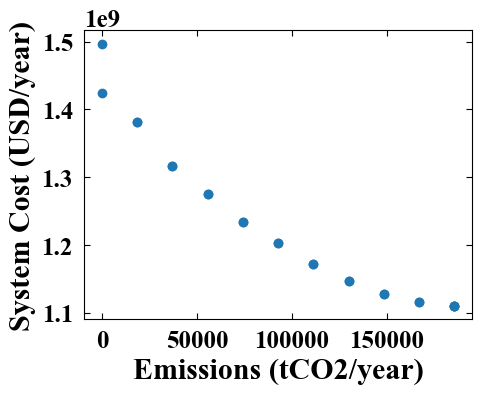

In [268]:
emissions_syscost_df=create_emissions_syscost_df(CEM_min_hours_dict)
plot_emissions_systemcost(emissions_syscost_df,'emissions_test')

### Getting columns that you want 

In [229]:
# get the scenarios you want: 
columns_download = ['base','emissions_TES0','emissions0']

filter_df(curtailment_df,columns_download,'CEM_0/curtailment_base')
filter_df(syscost_df,columns_download,'CEM_0/syscost_base')
filter_df(emissions_df,columns_download,'CEM_0/emissions_base')
filter_df(capacity_df,columns_download,'CEM_0/capacity_base')


KeyError: 'Label'

In [ ]:
all_LCOE_df = create_LCOE_df(CEM_min_hours_dict)
sns.heatmap(all_LCOE_df.set_index('Label'))
plt.title('LCOE')

In [ ]:
all_LCOE_df  #$/kWh

In [ ]:
relative_gap(CEM_min_hours_dict).plot(kind='bar')#,label='Label')

## Making the graph all together

In [230]:
# CEM_dir = 'CEM_0/'
# CEM_dir = 'CEM_age_0/'
# CEM_dir = 'CEM_eff_0/'
# CEM_dir = 'CEM_storage_0/'
# CEM_dir = 'CEM_flat_0/'
CEM_dir = 'CEM_filter/'

# - CEM_dir_index = 35
# - CEM_age_dir_index = 39
# - CEM_eff_dir_index = 39
# - CEM_storage_dir_index = 43
# - CEM_flat_dir_index = 40

CEM_dir_index = 42
CEM_scenarios_dict = create_sensitivity_dict(CEM_dir)
CEM_min_hours_dict = create_UP_min_hours_dict(CEM_scenarios_dict,CEM_dir,CEM_dir_index)

curtailment_df = create_curtailment_df(CEM_min_hours_dict)
generation_df = create_generation_df(CEM_min_hours_dict)
capacity_df = create_capacity_df(CEM_min_hours_dict)
E_storage_df = create_E_storage_df(CEM_min_hours_dict)
P_storage_df = create_P_storage_df(CEM_min_hours_dict)
storage_dispatch_df = create_storage_dispatch_df(CEM_min_hours_dict)
conversions_df = create_conversions_df(CEM_min_hours_dict)
emissions_df = create_emissions_df(CEM_min_hours_dict)
syscost_df = create_syscost_df(CEM_min_hours_dict)

# columns_download = ['base','emissions_TES0','emissions0']

# filter_df(curtailment_df,columns_download,'CEM_0/curtailment_base')
# filter_df(syscost_df,columns_download,'CEM_0/syscost_base')
# filter_df(emissions_df,columns_download,'CEM_0/emissions_base')
# filter_df(capacity_df,columns_download,'CEM_0/capacity_base')

# #CEM_age
# columns_download = ['CEM_TES_life15emissions0','CEM_TES_life35emissions0']

# filter_df(curtailment_df,columns_download,'CEM_age_0/curtailment_age')
# filter_df(syscost_df,columns_download,'CEM_age_0/syscost_age')
# filter_df(emissions_df,columns_download,'CEM_age_0/emissions_age')
# filter_df(capacity_df,columns_download,'CEM_age_0/capacity_age')

# # #CEM_eff
# columns_download = ['CEM_TES_eff45emissions0','CEM_TES_eff35emissions0']

# filter_df(curtailment_df,columns_download,'CEM_eff_0/curtailment_eff')
# filter_df(syscost_df,columns_download,'CEM_eff_0/syscost_eff')
# filter_df(emissions_df,columns_download,'CEM_eff_0/emissions_eff')
# filter_df(capacity_df,columns_download,'CEM_eff_0/capacity_eff')

# # #CEM_storage
# columns_download = ['ers/CEM_TES_storage20emissions0','ers/CEM_TES_storage200emissions0']

# filter_df(curtailment_df,columns_download,'CEM_storage_0/curtailment_sto')
# filter_df(syscost_df,columns_download,'CEM_storage_0/syscost_sto')
# filter_df(emissions_df,columns_download,'CEM_storage_0/emissions_sto')
# filter_df(capacity_df,columns_download,'CEM_storage_0/capacity_sto')

# #CEM_flat
# columns_download = ['/CEM_emissions_TES_flat0']

# filter_df(curtailment_df,columns_download,'CEM_flat_0/curtailment_flat')
# filter_df(syscost_df,columns_download,'CEM_flat_0/syscost_flat')
# filter_df(emissions_df,columns_download,'CEM_flat_0/emissions_flat')
# filter_df(capacity_df,columns_download,'CEM_flat_0/capacity_flat')


In [68]:
((syscost_df.iloc[3,1]-syscost_df.iloc[2,1])/syscost_df.iloc[2,1]) * 100

3.2632402971264636

In [97]:
E_storage_df['TES']*[0.41,0.41,0.41,0.41,0.41,0.35,0.41,0.45,0.41]/P_storage_df['TES']

0    14.046774
1          NaN
2    19.380591
3    14.046774
4    12.753543
5    14.138060
6    13.979866
7    13.691984
8          NaN
Name: TES, dtype: float64

In [98]:
P_storage_df

,Label,TES,Li-ion
0,rs/CEM_emissions_TES0,350.258348,2680.002863
1,rs/CEM_emissions0,0.000000,2803.189759
2,rs/CEM_TES_storage20emissions0,253.862227,2680.380122
3,rs/CEM_TES_storage200emissions0,350.258348,2680.034524
4,rs/CEM_TES_life40emissions0,385.775144,2680.160573
5,rs/CEM_TES_eff35emissions0,297.070452,2698.184851
6,rs/CEM_TES_life15emissions0,351.934698,2680.114931
7,rs/CEM_TES_eff45emissions0,394.391359,2667.989432
8,rs/CEM_base,0.000000,2035.301405


In [70]:
syscost_df

,Label,system cost
0,rs/CEM_emissions_TES0,1.424652e+09
1,rs/CEM_emissions0,1.497115e+09
2,rs/CEM_TES_storage20emissions0,1.404337e+09
3,rs/CEM_TES_storage200emissions0,1.450164e+09
4,rs/CEM_TES_life40emissions0,1.422391e+09
5,rs/CEM_TES_eff35emissions0,1.439159e+09
6,rs/CEM_TES_life15emissions0,1.430449e+09
7,rs/CEM_TES_eff45emissions0,1.414994e+09
8,rs/CEM_base,1.110464e+09


In [71]:
carbon_cost_0 = (syscost_df.iloc[2,1]-syscost_df.iloc[8,1])/185164.203358
carbon_cost_2 = (syscost_df.iloc[3,1]-syscost_df.iloc[8,1])/185164.203358

print(carbon_cost_2, carbon_cost_0)

((carbon_cost_0 - carbon_cost_2)/carbon_cost_0) *100

1834.586817350786 1587.093532974967


-15.594120903000535

In [72]:
100*(curtailment_df.iloc[2,1]-curtailment_df.iloc[3,1])/curtailment_df.iloc[2,1]



0.42678363018180937

In [88]:
curtailment_df

,Label,Curtailment,curtailment difference
0,rs/CEM_emissions_TES0,0.512925,-1.605866
1,rs/CEM_emissions0,0.521297,0.000000
2,rs/CEM_TES_storage20emissions0,0.513832,-1.431926
3,rs/CEM_TES_storage200emissions0,0.511639,-1.852598
4,rs/CEM_TES_life40emissions0,0.514019,-1.396076
5,rs/CEM_TES_eff35emissions0,0.509623,-2.239308
6,rs/CEM_TES_life15emissions0,0.511876,-1.807199
7,rs/CEM_TES_eff45emissions0,0.512744,-1.640763
8,rs/CEM_base,0.386799,-25.800614


Text(81.45833333333333, 0.5, 'System Cost Relative to Base Case \n (USD/year)')

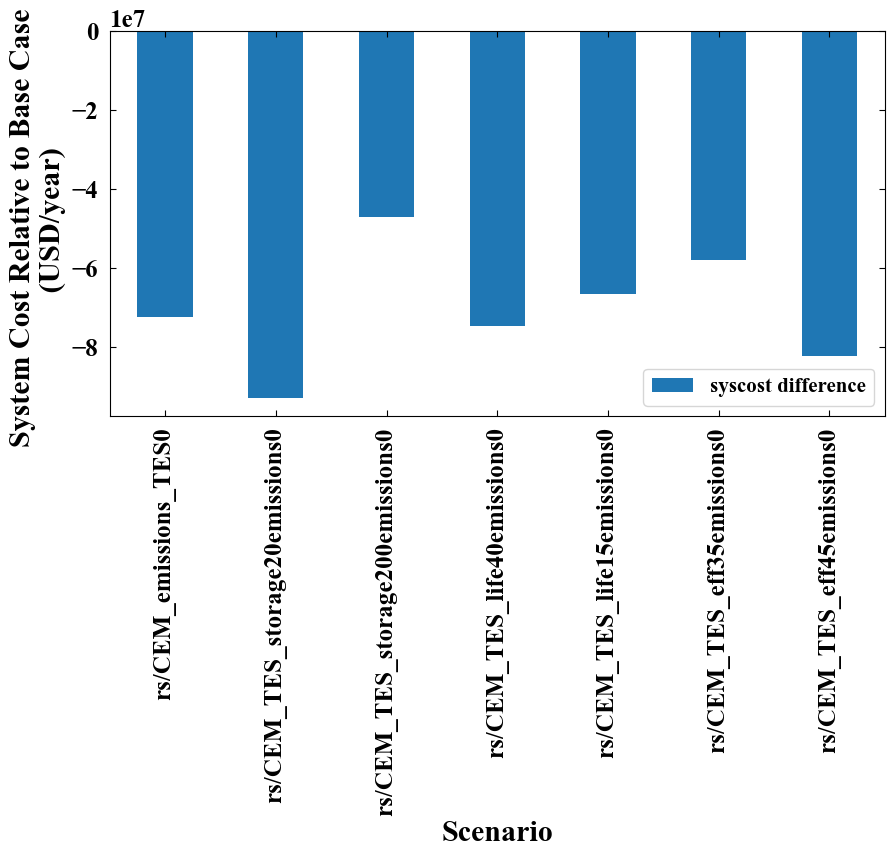

In [235]:
base_syscost = syscost_df.iloc[1,1]
# syscost_df['syscost difference']  = ((syscost_df['system cost'] - base_syscost)/base_syscost)*100
syscost_df['syscost difference']  = (syscost_df['system cost']-base_syscost)

syscost_diff_df = syscost_df.drop(['system cost'],axis=1).iloc[[0,2,3,4,6,5,7],:]

plot_stacked(syscost_diff_df,'syscost_diff')
plt.ylabel('System Cost Relative to Base Case \n (USD/year)')
# plt.legend(None)

In [93]:
syscost_diff_df

,Label,syscost difference
0,rs/CEM_emissions_TES0,-4.840219
2,rs/CEM_TES_storage20emissions0,-6.197123
3,rs/CEM_TES_storage200emissions0,-3.136110
4,rs/CEM_TES_life40emissions0,-4.991228
5,rs/CEM_TES_eff35emissions0,-3.871226
6,rs/CEM_TES_life15emissions0,-4.453001
7,rs/CEM_TES_eff45emissions0,-5.485317


In [80]:
curtailment_df

,Label,Curtailment
0,rs/CEM_emissions_TES0,0.512925
1,rs/CEM_emissions0,0.521297
2,rs/CEM_TES_storage20emissions0,0.513832
3,rs/CEM_TES_storage200emissions0,0.511639
4,rs/CEM_TES_life40emissions0,0.514019
5,rs/CEM_TES_eff35emissions0,0.509623
6,rs/CEM_TES_life15emissions0,0.511876
7,rs/CEM_TES_eff45emissions0,0.512744
8,rs/CEM_base,0.386799


In [237]:
curtailment_df

,Label,Curtailment,curtailment difference
0,rs/CEM_emissions_TES0,0.512925,0.512925
1,rs/CEM_emissions0,0.521297,0.521297
2,rs/CEM_TES_storage20emissions0,0.513832,0.513832
3,rs/CEM_TES_storage200emissions0,0.511639,0.511639
4,rs/CEM_TES_life40emissions0,0.514019,0.514019
5,rs/CEM_TES_eff35emissions0,0.509623,0.509623
6,rs/CEM_TES_life15emissions0,0.511876,0.511876
7,rs/CEM_TES_eff45emissions0,0.512744,0.512744
8,rs/CEM_base,0.386799,0.386799


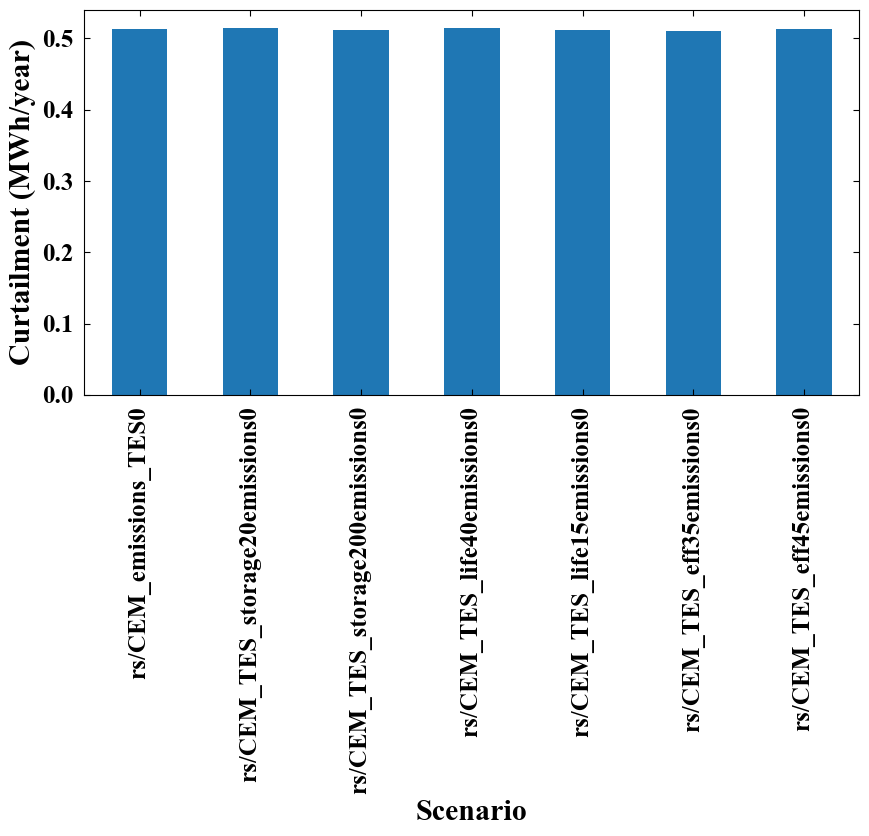

In [239]:
base_curtail = curtailment_df.iloc[1,1]
# curtailment_df['curtailment difference']  = ((curtailment_df['Curtailment'] - base_curtail)/base_curtail)*100
curtailment_df['curtailment difference']  = curtailment_df['Curtailment']

curtail_diff_df = curtailment_df.drop(['Curtailment'],axis=1).iloc[[0,2,3,4,6,5,7],:]

# plot_stacked(curtail_diff_df,'curtail_diff')
# plt.ylabel('Curtailment (MWh/year)')

plot_stacked(curtail_diff_df,'curtail')
plt.ylabel('Curtailment (MWh/year)')

plt.legend('', frameon=False)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


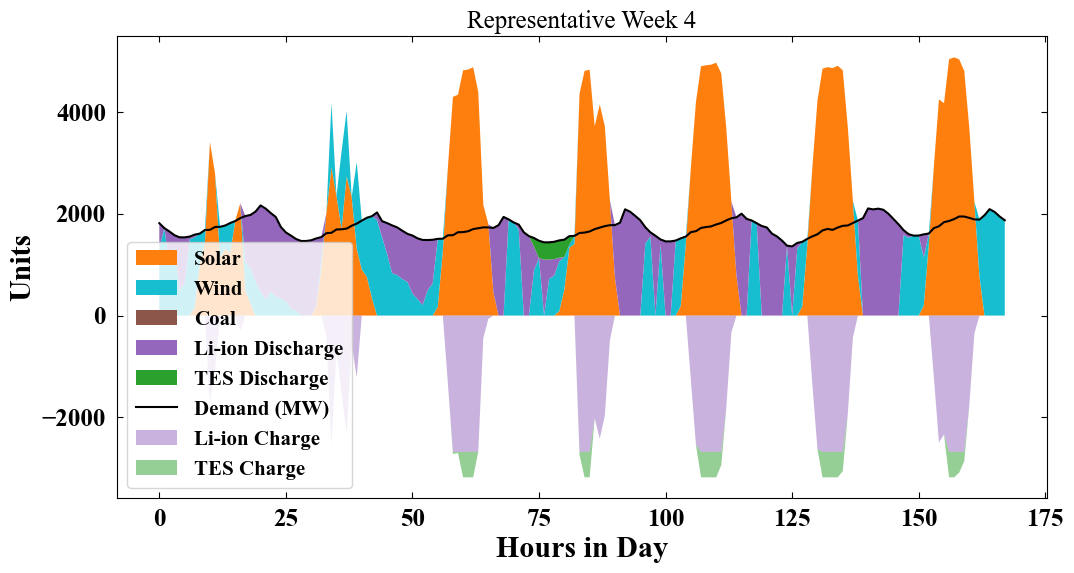

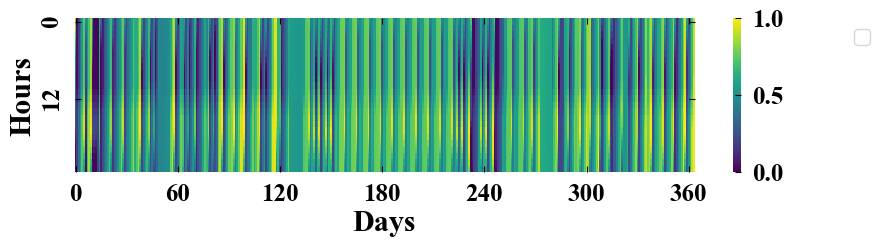

In [105]:
## CHOOOSE DIFFERENT KEY TO SEE IF DISPATCH CHANGES OVER THE YEAR WITH LOWER STORAGE COST
KEY = 'rs/CEM_TES_storage200emissions0'
# KEY = 'rs/CEM_emissions_TES0'

results_df = pd.DataFrame.from_dict(CEM_min_hours_dict[0][KEY], orient='index').transpose()
n=4
plot_dispatch(n,results_df)
plot_storage_heatmap(results_df)
plt.legend(bbox_to_anchor=(1.3,1))

In [106]:
results_df["TES_dispatch"]

0    234065.640137
Name: TES_dispatch, dtype: object

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


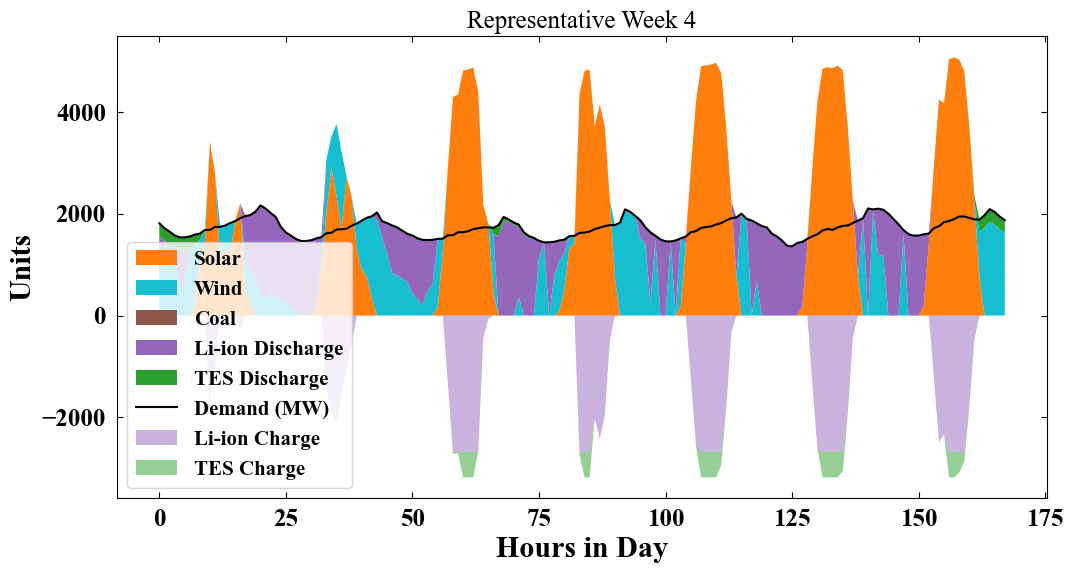

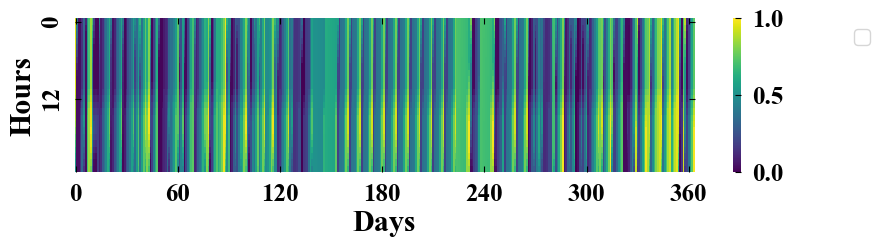

In [240]:
## CHOOOSE DIFFERENT KEY TO SEE IF DISPATCH CHANGES OVER THE YEAR WITH LOWER STORAGE COST
KEY = 'rs/CEM_TES_storage20emissions0'
results_df = pd.DataFrame.from_dict(CEM_min_hours_dict[0][KEY], orient='index').transpose()
n=4
plot_dispatch(n,results_df)
plot_storage_heatmap(results_df)
plt.legend(bbox_to_anchor=(1.3,1))

In [241]:
results_df["TES_dispatch"]

0    195839.572249
Name: TES_dispatch, dtype: object

In [243]:
capacity_df

,Label,Solar,Wind,Coal,TES,Li-ion
0,rs/CEM_emissions_TES0,8755.839672,4323.927067,0.0,350.258348,2680.002863
1,rs/CEM_emissions0,9071.267900,4145.738992,0.0,0.000000,2803.189759
2,rs/CEM_TES_storage20emissions0,8756.878102,4323.063308,0.0,253.862227,2680.380122
3,rs/CEM_TES_storage200emissions0,8755.914716,4323.907731,0.0,350.258348,2680.034524
4,rs/CEM_TES_life40emissions0,8756.202893,4323.877242,0.0,385.775144,2680.160573
5,rs/CEM_TES_eff35emissions0,8802.014755,4299.300519,0.0,297.070452,2698.184851
6,rs/CEM_TES_life15emissions0,8756.048202,4324.109337,0.0,351.934698,2680.114931
7,rs/CEM_TES_eff45emissions0,8725.479157,4339.544961,0.0,394.391359,2667.989432
8,rs/CEM_base,6431.741881,3314.436714,500.0,0.000000,2035.301405


In [244]:
generation_df

,Label,Solar,Wind,Coal
0,rs/CEM_emissions_TES0,1.213659e+07,2.390330e+06,0.000000
1,rs/CEM_emissions0,1.190731e+07,2.267219e+06,0.000000
2,rs/CEM_TES_storage20emissions0,1.210541e+07,2.393601e+06,0.000000
3,rs/CEM_TES_storage200emissions0,1.217646e+07,2.388842e+06,0.000000
4,rs/CEM_TES_life40emissions0,1.209558e+07,2.398897e+06,0.000000
5,rs/CEM_TES_eff35emissions0,1.225282e+07,2.359941e+06,0.000000
6,rs/CEM_TES_life15emissions0,1.218447e+07,2.374246e+06,0.000000
7,rs/CEM_TES_eff45emissions0,1.214573e+07,2.393794e+06,0.000000
8,rs/CEM_base,9.116554e+06,4.644808e+06,190890.931296


In [245]:
E_storage_df

,Label,TES,Li-ion
0,rs/CEM_emissions_TES0,12000.0,25543.357374
1,rs/CEM_emissions0,0.0,30687.526318
2,rs/CEM_TES_storage20emissions0,12000.0,25553.795920
3,rs/CEM_TES_storage200emissions0,12000.0,25542.561044
4,rs/CEM_TES_life40emissions0,12000.0,25540.296249
5,rs/CEM_TES_eff35emissions0,12000.0,26288.707323
6,rs/CEM_TES_life15emissions0,12000.0,25542.670718
7,rs/CEM_TES_eff45emissions0,12000.0,25047.943131
8,rs/CEM_base,0.0,19619.342017


In [246]:
30687.526318*0.95 / 2803.189759 #without TES

10.399991619725377

In [247]:
25543.357374*0.95 / 2680.002863#with TES

9.054538650058149

In [248]:
12000.0*0.41/350.258348

14.046774411212605

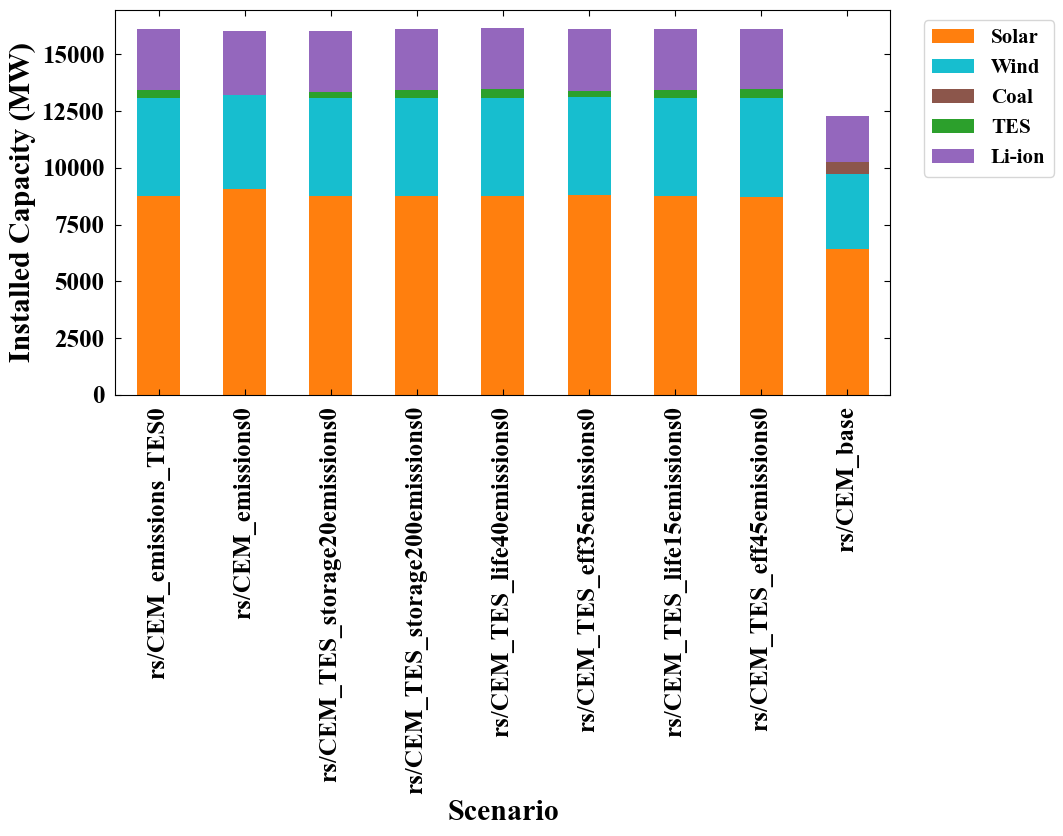

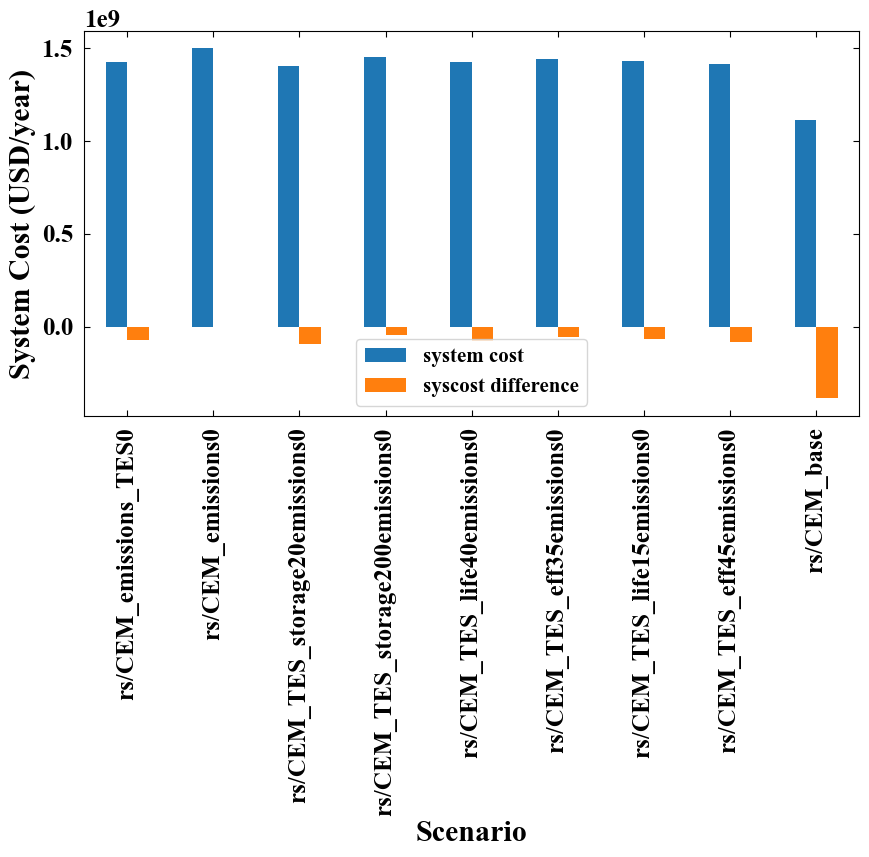

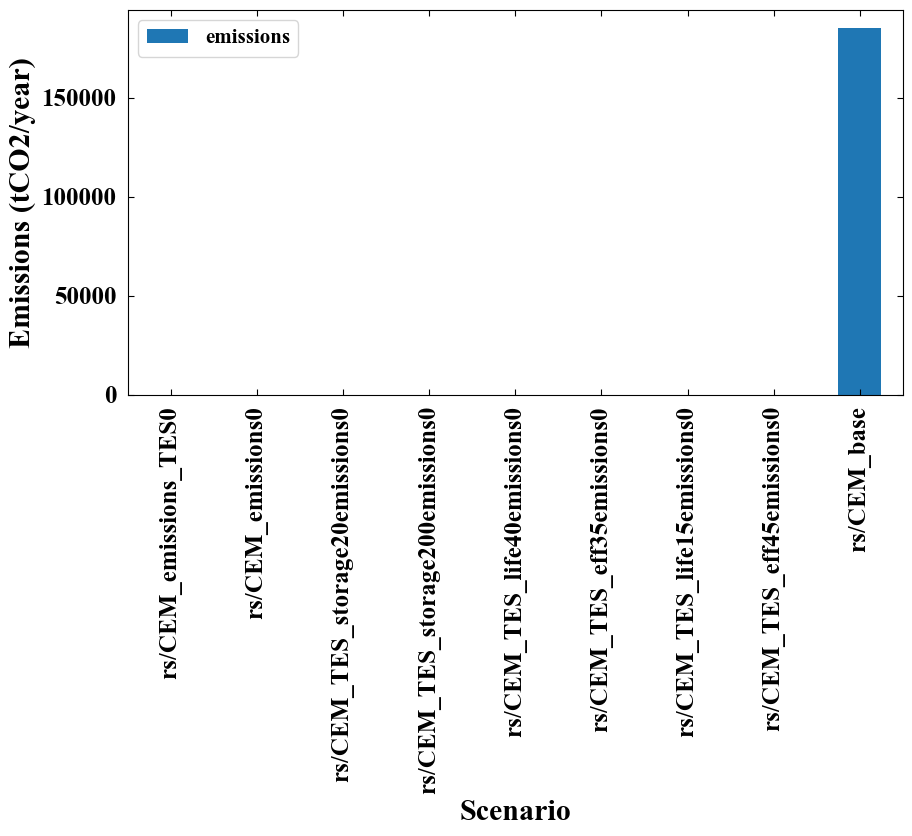

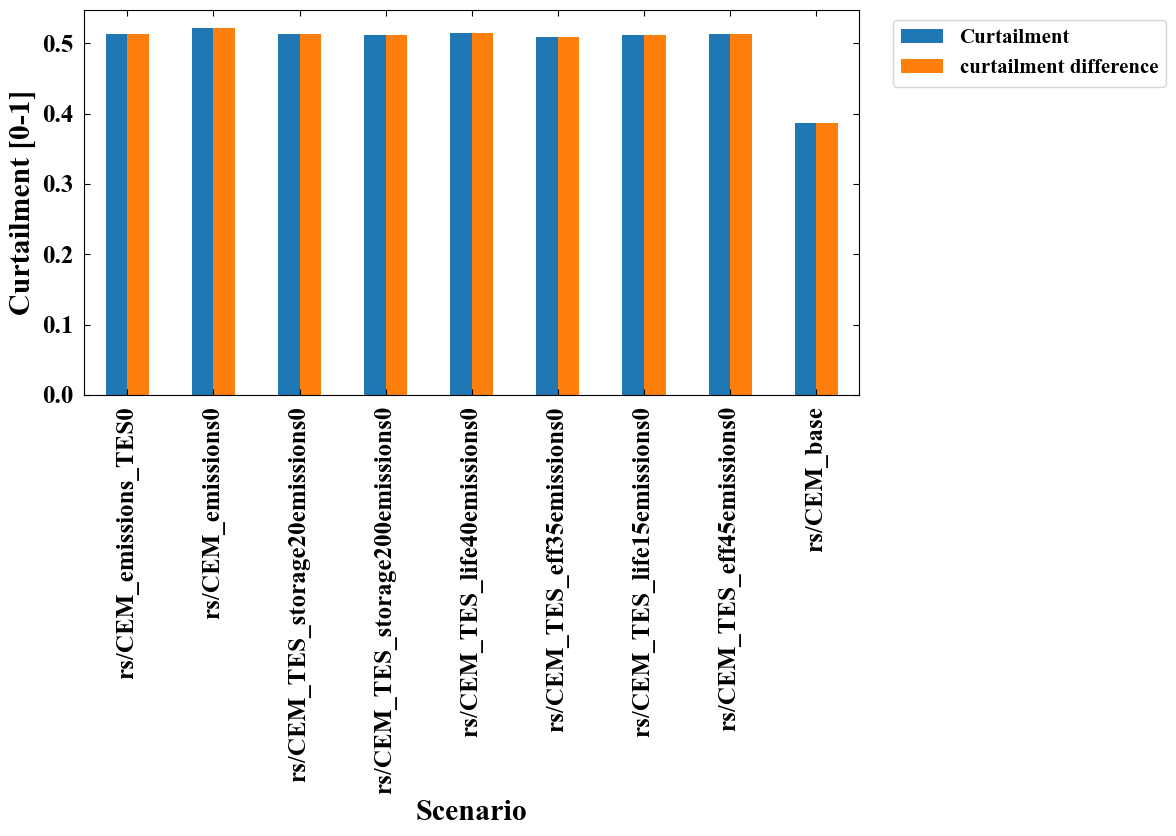

In [242]:
plot_stacked(capacity_df,'capacity')
plt.ylabel('Installed Capacity (MW)')
plt.legend(bbox_to_anchor=(1.03,1))

plot_stacked(syscost_df,'syscost')
plt.ylabel('System Cost (USD/year)')
# plt.legend(False)

plot_stacked(emissions_df,'emissions')
plt.ylabel('Emissions (tCO2/year)')

plot_stacked(curtailment_df,'curtailment')
plt.ylabel('Curtailment [0-1]')
plt.legend(bbox_to_anchor=(1.03,1))


Text(76.83333333333333, 0.5, 'Curtailment [0-1]')

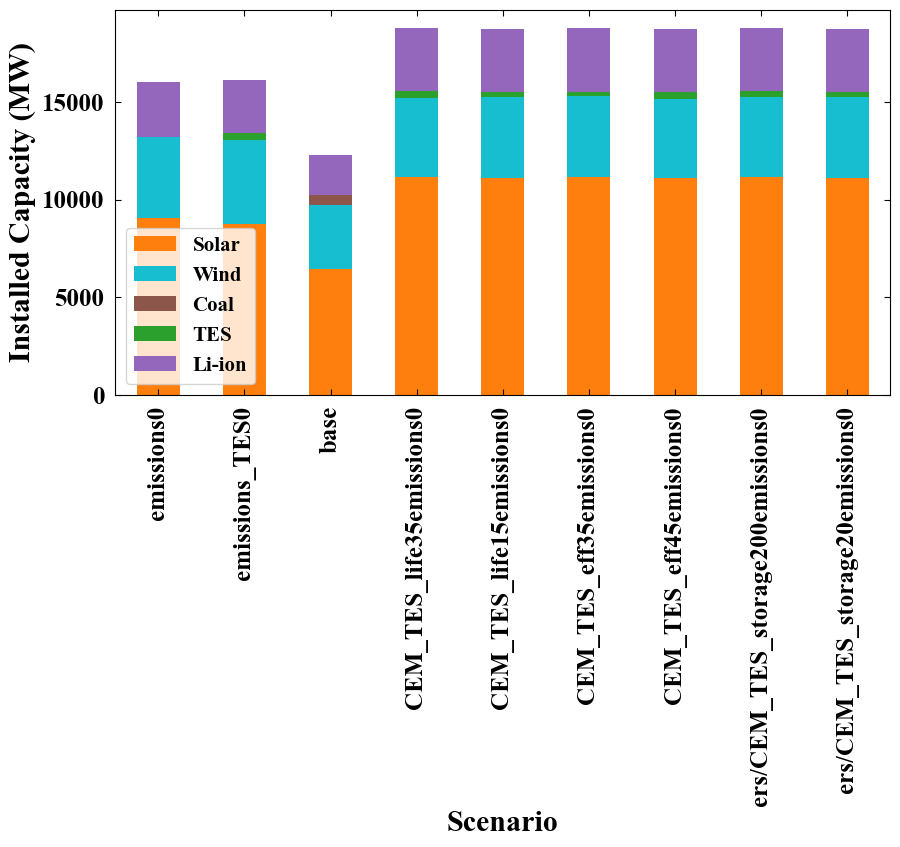

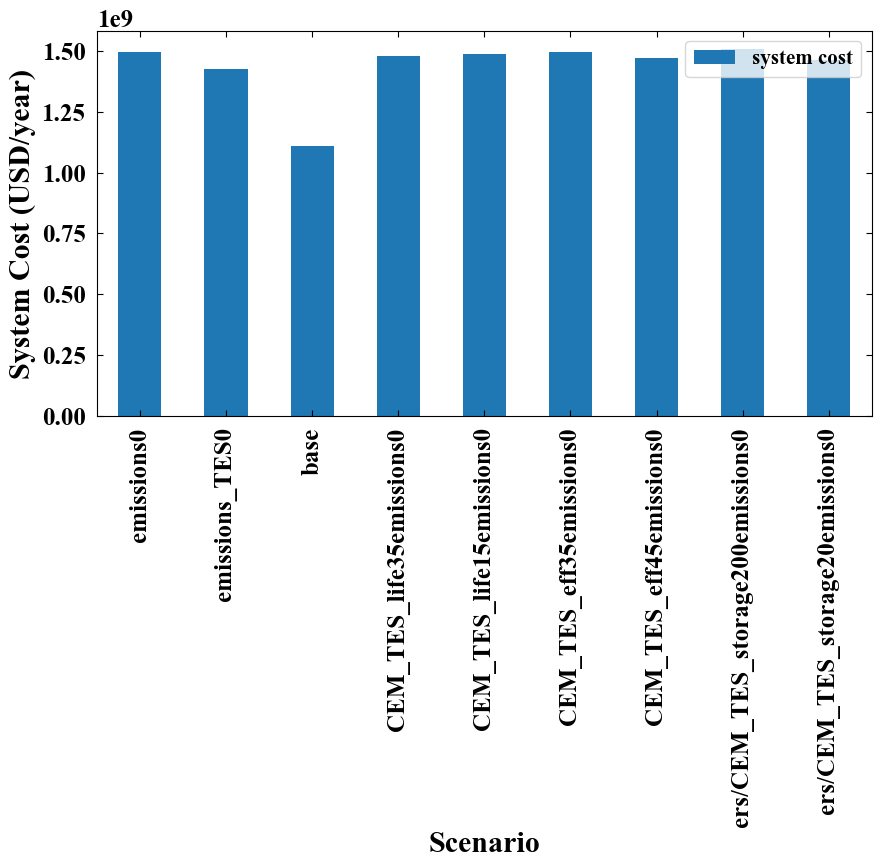

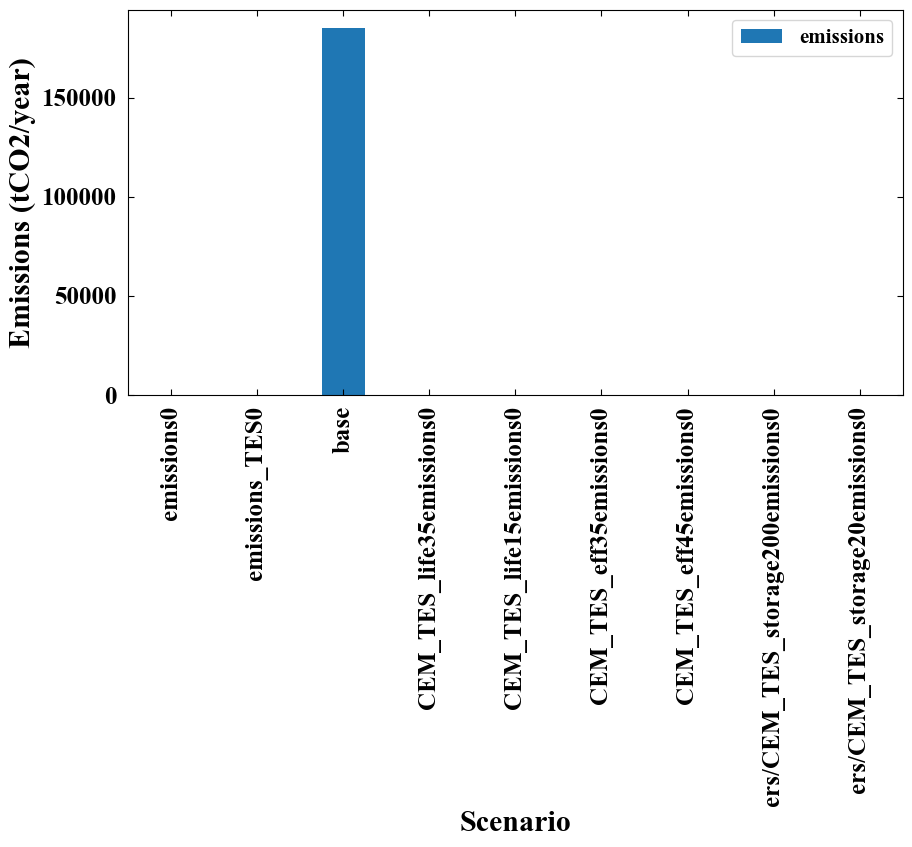

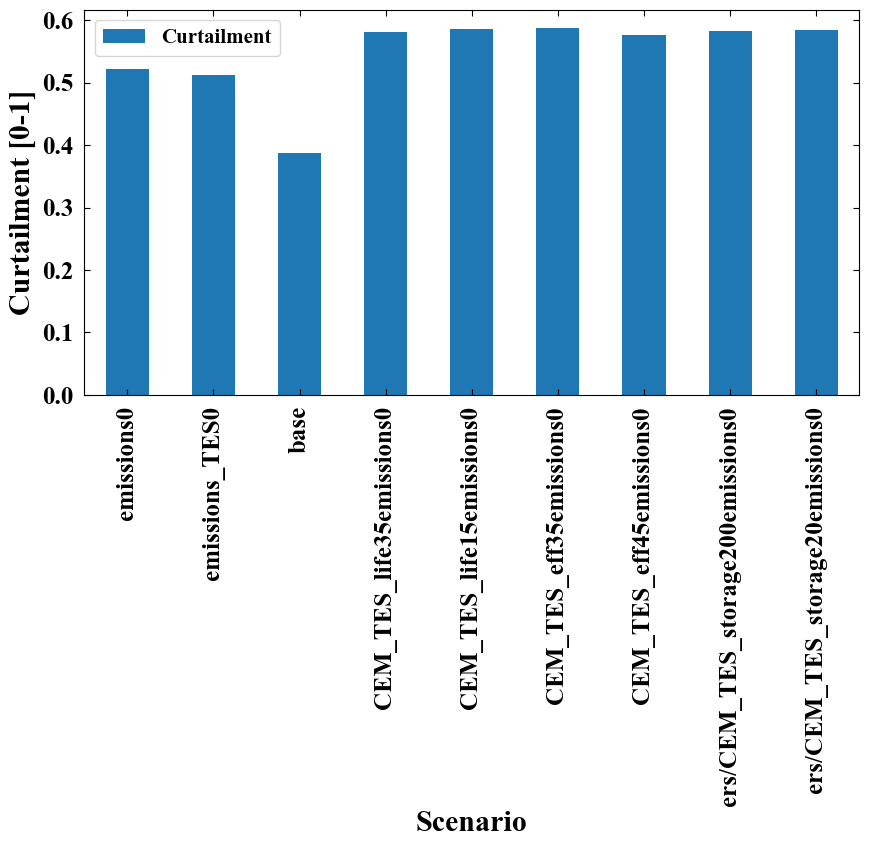

In [17]:
# capacity_final_df = pd.concat((pd.read_csv('CEM_0/capacity_base.csv'),
#            pd.read_csv('CEM_age_0/capacity_age.csv'),
#            pd.read_csv('CEM_eff_0/capacity_eff.csv'),
#            pd.read_csv('CEM_storage_0/capacity_sto.csv'),
#            #pd.read_csv('CEM_flat_0/capacity_flat.csv')

#            )).reset_index(drop=True)

# syscost_final_df = pd.concat((pd.read_csv('CEM_0/syscost_base.csv'),
#            pd.read_csv('CEM_age_0/syscost_age.csv'),
#            pd.read_csv('CEM_eff_0/syscost_eff.csv'),
#            pd.read_csv('CEM_storage_0/syscost_sto.csv'),
#            #pd.read_csv('CEM_flat_0/capacity_flat.csv')

#            )).reset_index(drop=True)

# emissions_final_df = pd.concat((pd.read_csv('CEM_0/emissions_base.csv'),
#            pd.read_csv('CEM_age_0/emissions_age.csv'),
#            pd.read_csv('CEM_eff_0/emissions_eff.csv'),
#            pd.read_csv('CEM_storage_0/emissions_sto.csv'),
#            #pd.read_csv('CEM_flat_0/capacity_flat.csv')

#            )).reset_index(drop=True)

# curtailment_final_df = pd.concat((pd.read_csv('CEM_0/curtailment_base.csv'),
#            pd.read_csv('CEM_age_0/curtailment_age.csv'),
#            pd.read_csv('CEM_eff_0/curtailment_eff.csv'),
#            pd.read_csv('CEM_storage_0/curtailment_sto.csv'),
#            #pd.read_csv('CEM_flat_0/capacity_flat.csv')

#            )).reset_index(drop=True)




plot_stacked(capacity_final_df,'capacity')
plt.ylabel('Installed Capacity (MW)')

plot_stacked(syscost_final_df,'syscost')
plt.ylabel('System Cost (USD/year)')

plot_stacked(emissions_final_df,'emissions')
plt.ylabel('Emissions (tCO2/year)')

plot_stacked(curtailment_final_df,'curtailment')
plt.ylabel('Curtailment [0-1]')
